# Линейные методы классификации и регрессии: метод опорных векторов

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Библиотеки

In [2]:
!wget -q -O requirements.txt https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem5/requirements.txt
!pip install -q -U -r requirements.txt

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Грязев Артём\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions


## SVM Classification

In [4]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)


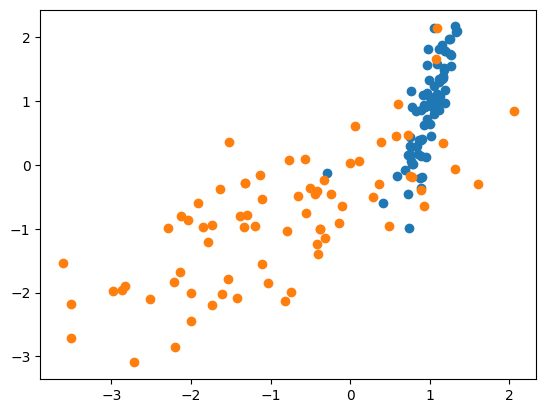

In [5]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [6]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

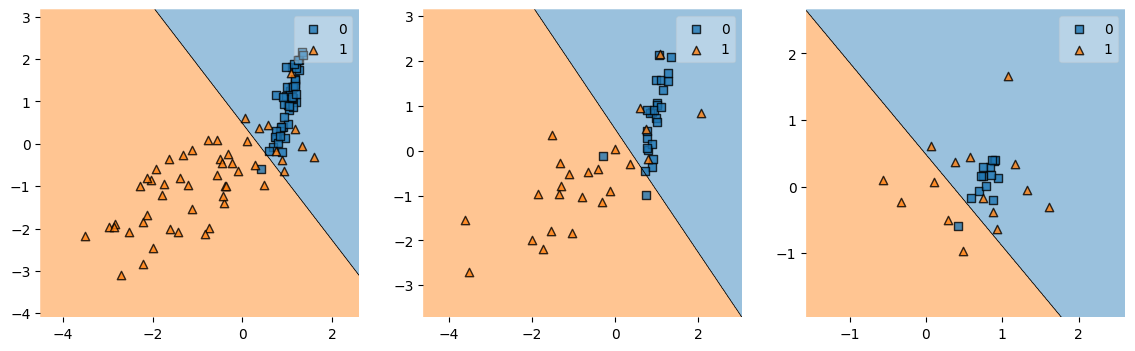

In [7]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [45]:
import os
def files_in_dir(path):
    res_files = []
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            res_files = res_files + files_in_dir(dir)
        for file in files:
            #append the file name to the list
            res_files.append(os.path.join(root,file))
    return res_files

In [48]:
cd ../../

c:\SideProjects\MyGit


In [50]:
print(files_in_dir("./"))

['git_tools\\.gitignore', 'git_tools\\some_analytics copy.ipynb', 'git_tools\\some_analytics.ipynb', 'git_tools\\.git\\COMMIT_EDITMSG', 'git_tools\\.git\\config', 'git_tools\\.git\\description', 'git_tools\\.git\\HEAD', 'git_tools\\.git\\index', 'git_tools\\.git\\hooks\\applypatch-msg.sample', 'git_tools\\.git\\hooks\\commit-msg.sample', 'git_tools\\.git\\hooks\\fsmonitor-watchman.sample', 'git_tools\\.git\\hooks\\post-update.sample', 'git_tools\\.git\\hooks\\pre-applypatch.sample', 'git_tools\\.git\\hooks\\pre-commit.sample', 'git_tools\\.git\\hooks\\pre-merge-commit.sample', 'git_tools\\.git\\hooks\\pre-push.sample', 'git_tools\\.git\\hooks\\pre-rebase.sample', 'git_tools\\.git\\hooks\\pre-receive.sample', 'git_tools\\.git\\hooks\\prepare-commit-msg.sample', 'git_tools\\.git\\hooks\\push-to-checkout.sample', 'git_tools\\.git\\hooks\\update.sample', 'git_tools\\.git\\info\\exclude', 'git_tools\\.git\\logs\\HEAD', 'git_tools\\.git\\logs\\refs\\heads\\main', 'git_tools\\.git\\logs\\refs

## Ядра для SVM

In [8]:
np.random.seed(0)
m = 150
n = 2
X = 10*np.random.randn(m, n)

Y = np.array((X[:,0]**2+X[:,1]**2+50*np.random.randn(m))<100, dtype=np.int64)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

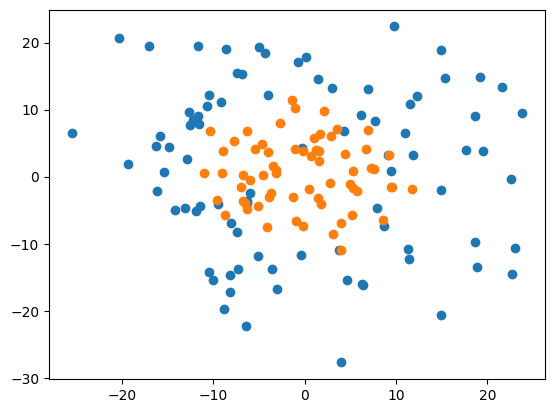

In [9]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [10]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

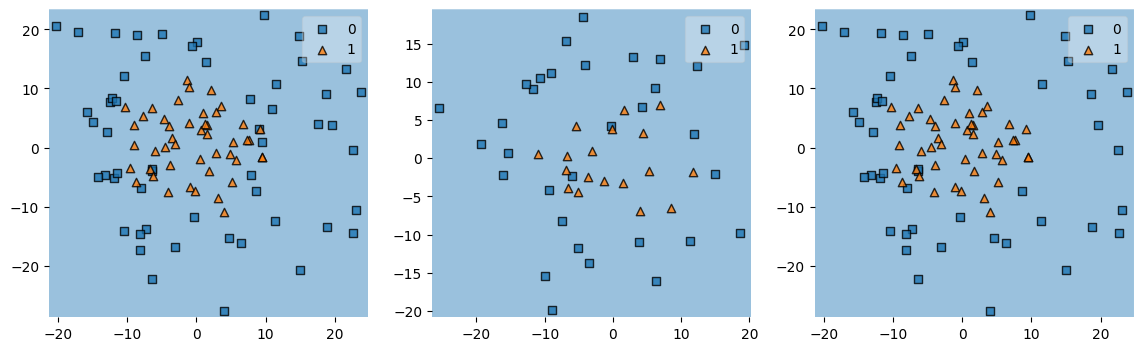

In [11]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [12]:
model = SVC(kernel='poly')
_ = model.fit(X_train, Y_train)

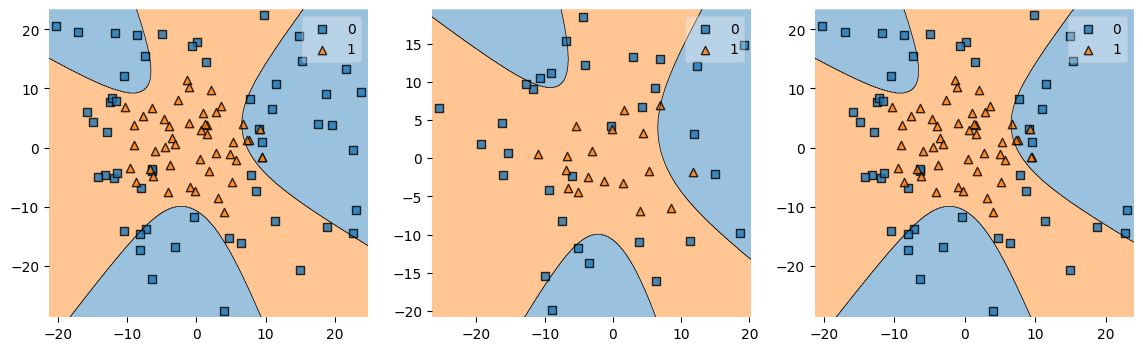

In [13]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [14]:
model = SVC(kernel='sigmoid')
_ = model.fit(X_train, Y_train)

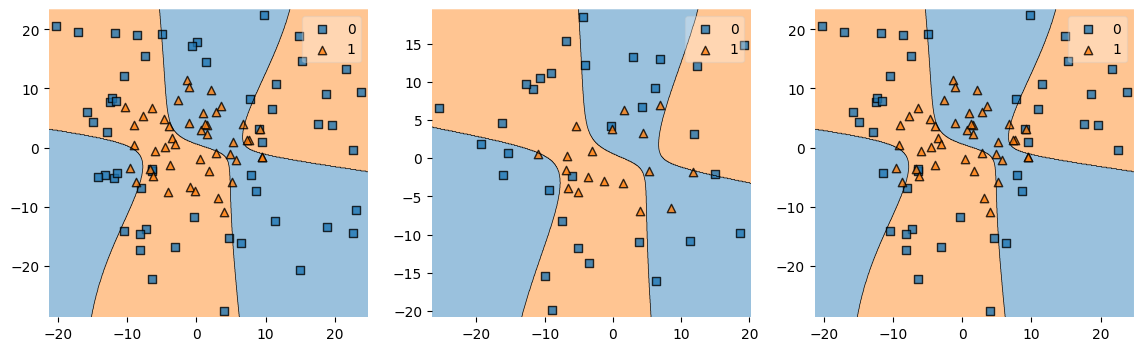

In [15]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [16]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)

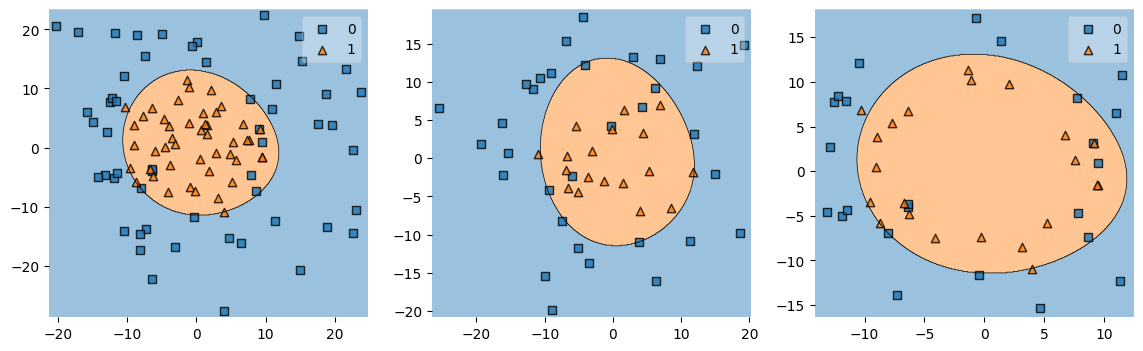

In [17]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [18]:
def kernel(X1, X2):
    return (X1@X2.T)**2

In [19]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train)

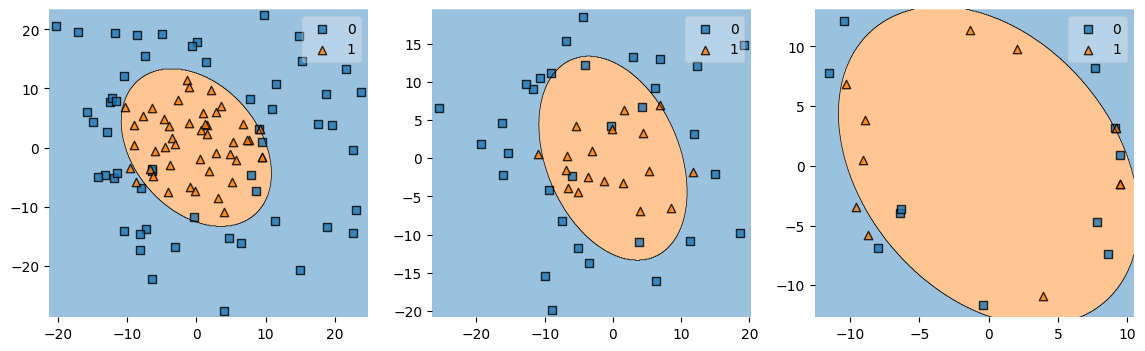

In [20]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

## SVM Regression

In [21]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x, np.sin(x)]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

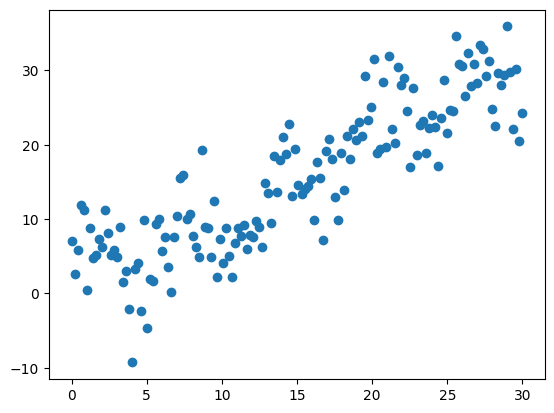

In [22]:
plt.plot(X[:, 0], Y, 'o')
    
plt.show()

In [23]:
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

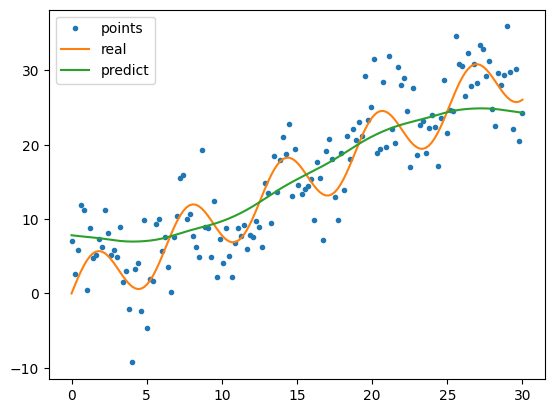

In [24]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

In [25]:
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

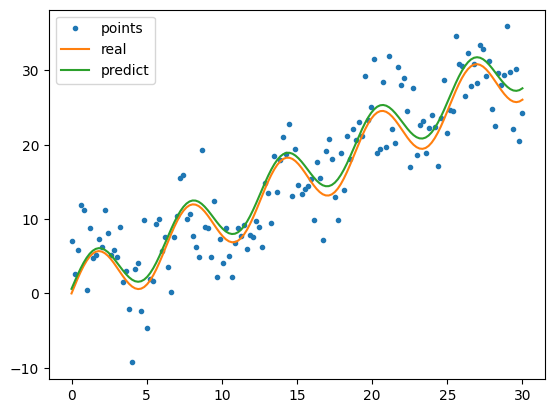

In [26]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

In [27]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [28]:
def kernel(X1, X2):
    return np.sin(X1)@np.sin(X2).T + X1@X2.T

In [29]:
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

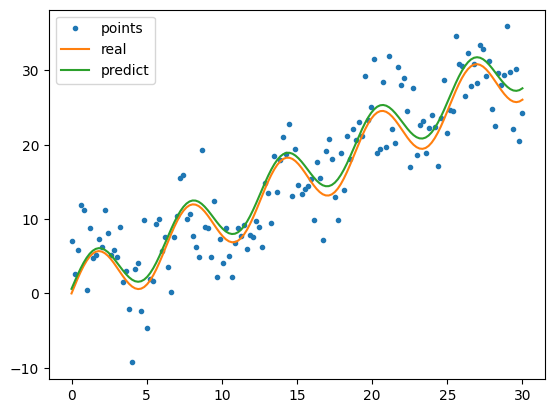

In [30]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

## SVM Feature

In [31]:
X, Y = make_classification(n_samples=2500, n_features=10, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=500, 
                                                    random_state=0)



In [32]:
def kernel(X1, X2):
    return np.exp(-0.05*cdist(X1, X2)**2)

In [33]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.91

In [34]:
X_train_new = np.hstack([kernel(X_train, X_train[model.support_]), X_train])
X_test_new = np.hstack([kernel(X_test, X_train[model.support_]), X_test])

In [35]:
model = SVC(kernel='rbf')
_ = model.fit(X_train_new, Y_train)
model.score(X_test_new, Y_test)

0.914

## Нормировка данных

Для реальных данных всегда нужно проводить предварительный анализ данных. В качтности требуется выполнить нормировку данных. Нормировка данных позволяет повысить устойчивость модели при обучении.

In [36]:
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [37]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

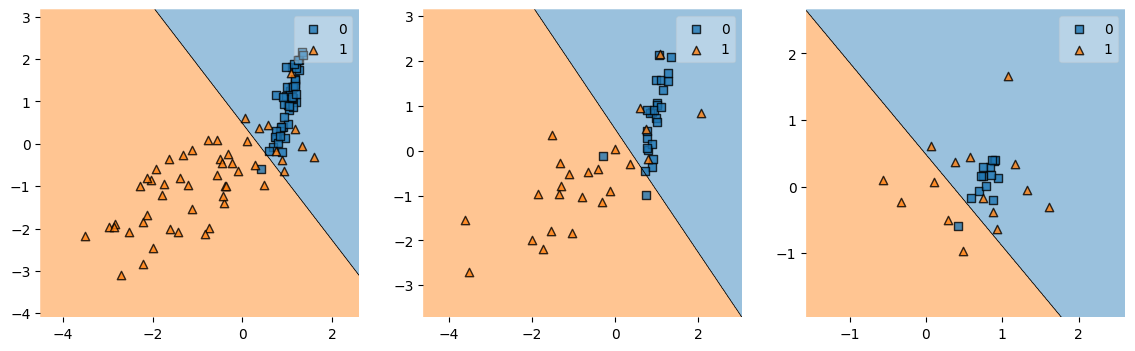

In [38]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [39]:
np.random.seed(0)
X, Y = make_classification(n_samples=150, n_features=2, 
                           n_informative=2, n_classes=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X = (X + 1000*np.random.randn(1, 2))*1000*np.random.randn(1, 2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [40]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8

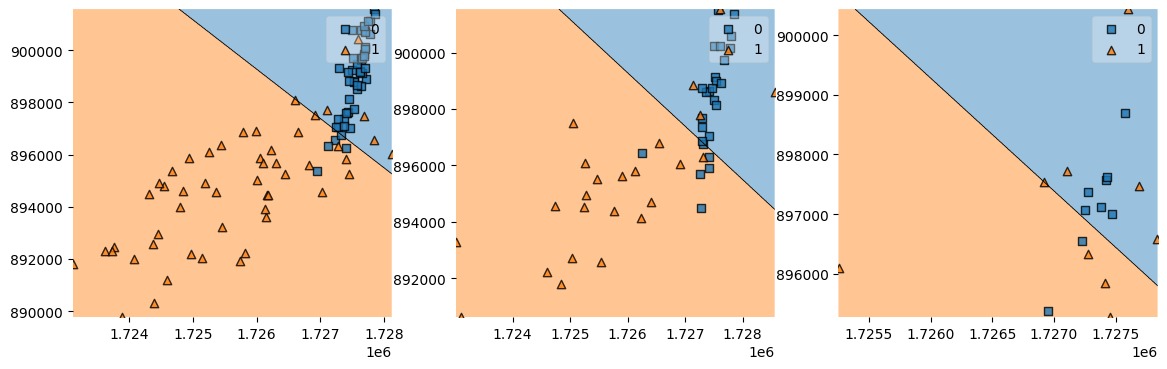

In [41]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

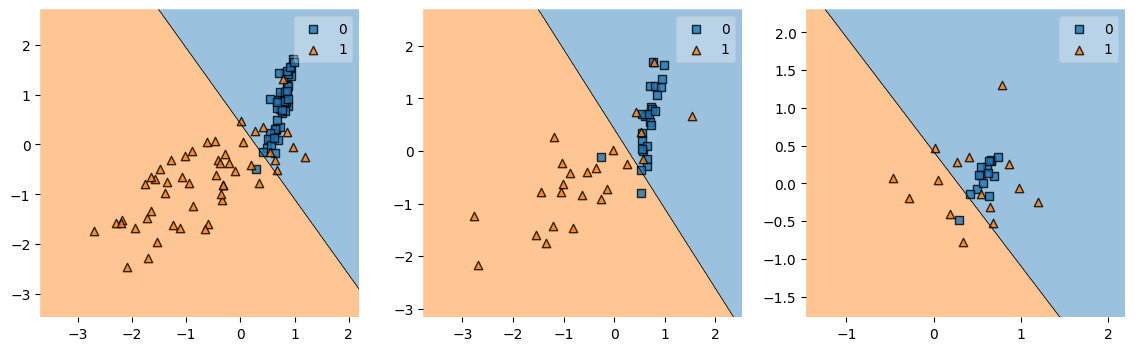

In [44]:
fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))


plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_], model, ax=ax[2])

plt.show()